<a href="https://colab.research.google.com/github/anujushir/My-Projects-ML-DL-and-NLP-/blob/main/ITIL_Ticket_Resolution_time_Prediction_ML_IM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the dataset (replace the path with the correct one)
data = pd.read_csv('/content/tickets.csv', encoding='ISO-8859-1')

print(data.head())
print(data.info())
print(data.isnull().sum())

# Convert date columns to datetime
data['Created'] = pd.to_datetime(data['Created'], errors='coerce')
data['Closed'] = pd.to_datetime(data['Closed'], errors='coerce')

# Fill missing dates with a default value (optional)
data['Created'].fillna(pd.Timestamp('2024-01-01'), inplace=True)
data['Closed'].fillna(pd.Timestamp('2024-01-01'), inplace=True)

# Calculate resolution time (in hours)
data['Resolution Time'] = (data['Closed'] - data['Created']).dt.total_seconds() / 3600

# Drop rows with missing target
data = data.dropna(subset=['Resolution Time'])

# Drop irrelevant columns (e.g., Number, Short description)
data = data.drop(columns=['Number', 'Short description'])

# Separate features and target
X = data.drop(columns=['Resolution Time'])
y = data['Resolution Time']


       Number Category Priority Incident state                  Definition  \
0  INC0450733  Network   Normal         Closed  Create to Resolve Duration   
1  INC0450733  Network   Normal         Closed        Assigned to Duration   
2  INC0450733  Network   Normal         Closed     Incident State Duration   
3  INC0450733  Network   Normal         Closed       First Call Resolution   
4  INC0450733  Network   Normal         Closed            Assignment Group   

             Closed         Short description Channel           Created  \
0  29-07-2024 17:00  firewall ports for kiosk    Chat  16-07-2024 14:42   
1  29-07-2024 17:00  firewall ports for kiosk    Chat  16-07-2024 14:42   
2  29-07-2024 17:00  firewall ports for kiosk    Chat  16-07-2024 14:42   
3  29-07-2024 17:00  firewall ports for kiosk    Chat  16-07-2024 14:42   
4  29-07-2024 17:00  firewall ports for kiosk    Chat  16-07-2024 14:42   

   Made SLA  
0      True  
1      True  
2      True  
3      True  
4      Tru

<ipython-input-2-85cc5d656c01>:18: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Created'] = pd.to_datetime(data['Created'], errors='coerce')
<ipython-input-2-85cc5d656c01>:19: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Closed'] = pd.to_datetime(data['Closed'], errors='coerce')
<ipython-input-2-85cc5d656c01>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[

In [ ]:
# Define categorical columns
categorical_columns = ['Category', 'Priority', 'Definition', 'Channel', 'Made SLA']

# Define preprocessing for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1006, learning_rate=0.1, max_depth=6, random_state=42))
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'Priority',
                                                   'Definition', 'Channel',
                                                   'Made SLA'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_ca...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1006, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

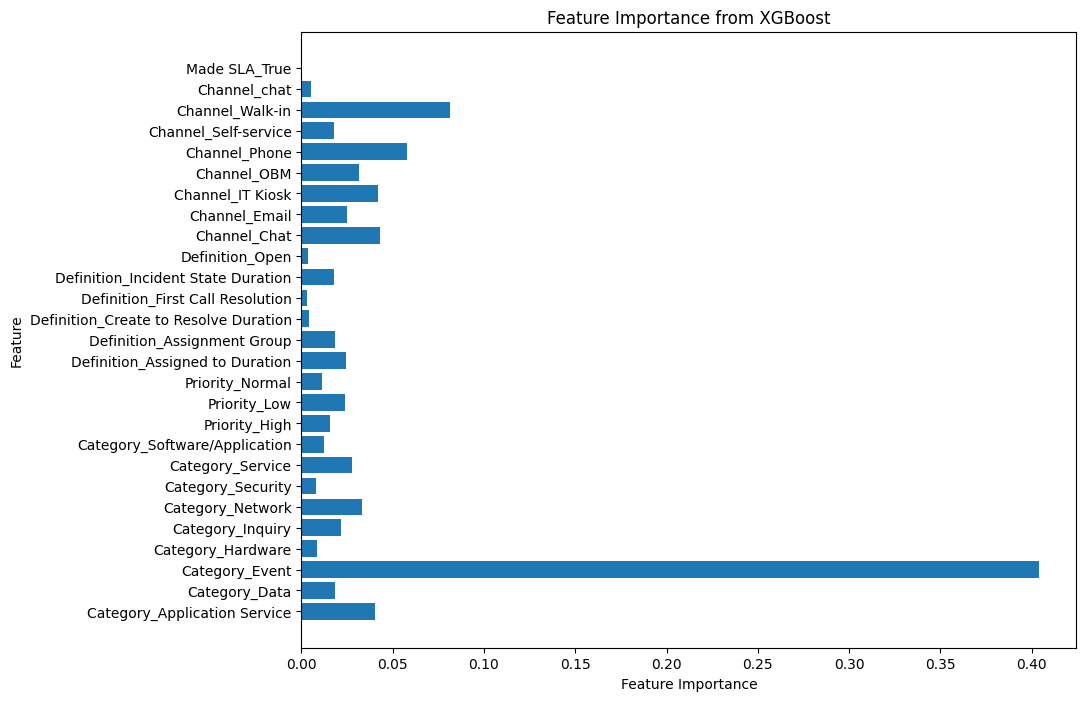

In [ ]:
# Extract feature importances
xgb_model = model.named_steps['xgb']
importance = xgb_model.feature_importances_

# Get feature names from the one-hot encoder
feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_columns)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from XGBoost")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2373.7857715587215
Root Mean Squared Error: 48.72151241042012
R-squared: 0.06638476229748536


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rmse_scores = (-cv_scores) ** 0.5
print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')


Cross-Validation RMSE Scores: [32.67041159 35.79876437 39.68252463 66.85045156 68.86939039]
Mean RMSE: 48.77430850761401


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [4, 6, 8],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 4, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}


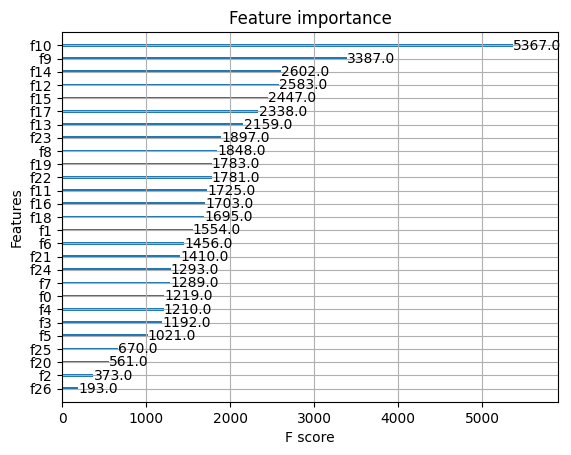

In [ ]:
# Retrieve the XGBoost model from the pipeline
xgb_model = model.named_steps['xgb']

# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight')
plt.show()


In [ ]:
!pip install shap


100%|===================| 19912/20000 [02:38<00:00]       

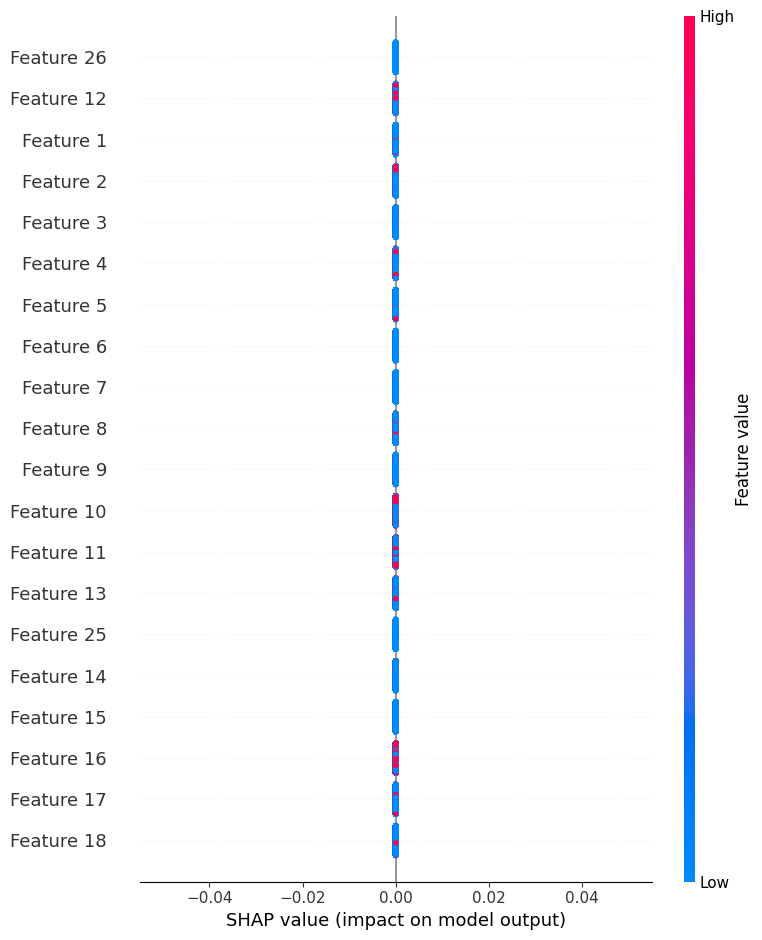

In [ ]:
import shap
import numpy as np

# Step 1: Extract the trained XGBoost model from the pipeline
xgb_model = model.named_steps['xgb']

# Step 2: Prepare the data for SHAP by applying the same preprocessing steps
X_train_preprocessed = model.named_steps['preprocessor'].transform(X_train).toarray()
X_test_preprocessed = model.named_steps['preprocessor'].transform(X_test).toarray()

# Step 3: Initialize SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_preprocessed)

# Step 4: Calculate SHAP values
shap_values = explainer(X_test_preprocessed)

# Step 5: Plot SHAP summary
shap.summary_plot(shap_values, X_test_preprocessed)


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'xgboost_pipeline_model.pkl')

# Load the model
loaded_model = joblib.load('xgboost_pipeline_model.pkl')


In [ ]:
import pandas as pd
from google.colab import files

# Read the already uploaded file
new_data = pd.read_csv('/content/tickets 2.csv', encoding='ISO-8859-1')

# Check for missing values and handle them accordingly
print(new_data.info())  # Ensure columns are in the correct format
new_data['Created'] = pd.to_datetime(new_data['Created'], errors='coerce', dayfirst=True)
new_data['Closed'] = pd.to_datetime(new_data['Closed'], errors='coerce', dayfirst=True)

# Fill missing date columns with default values (same as training)
new_data['Created'].fillna(pd.Timestamp('2024-01-01'), inplace=True)
new_data['Closed'].fillna(pd.Timestamp('2024-01-01'), inplace=True)

# Apply the preprocessing pipeline (without .toarray())
new_data_preprocessed = model.named_steps['preprocessor'].transform(new_data)

# Predict the resolution times for the new data
new_predictions = model.named_steps['xgb'].predict(new_data_preprocessed)

# Output the predictions
print(new_predictions)

# Add predictions to the new data and save
new_data['Predicted Resolution Time'] = new_predictions
new_data.to_csv('new_data_with_predictions.csv', index=False)

# Download the updated file
files.download('new_data_with_predictions.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61650 entries, 0 to 61649
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Number             61650 non-null  object
 1   Category           61650 non-null  object
 2   Priority           61650 non-null  object
 3   Incident state     61650 non-null  object
 4   Definition         61650 non-null  object
 5   Closed             61650 non-null  object
 6   Short description  61636 non-null  object
 7   Channel            61650 non-null  object
 8   Created            61650 non-null  object
 9   Made SLA           61650 non-null  bool  
dtypes: bool(1), object(9)
memory usage: 4.3+ MB
None


<ipython-input-11-f80df986f85b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Created'].fillna(pd.Timestamp('2024-01-01'), inplace=True)
<ipython-input-11-f80df986f85b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

[143.14294 154.85939 149.50386 ... 160.03703 160.03703 151.7723 ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data_preprocessed = model.named_steps['preprocessor'].transform(new_data).toarray()



In [ ]:
new_predictions = model.named_steps['xgb'].predict(new_data_preprocessed)
print(new_predictions)


[137.49918 137.49918 137.49918 ... 137.49918 137.49918 137.49918]


In [ ]:
import pandas as pd

# Assuming you have corrected the issue and new_data is preprocessed correctly
# new_data_preprocessed = model.named_steps['preprocessor'].transform(new_data).toarray()
new_predictions = model.named_steps['xgb'].predict(new_data_preprocessed)

# Add the predicted resolution times to the original new_data DataFrame
new_data['Predicted Resolution Time'] = new_predictions

# Save the updated DataFrame to a CSV file
new_data.to_csv('/content/new_data_with_predictions.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('/content/new_data_with_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>